Applying linear regression to the bike sharing data set.

We want to calculate the number of bikes depending on the season, working day/holiday, etc information we have explored in the Capital Bike Sharing project. Use the historical data, which are the ones with temperature and weather informations.

Use the R2 score and the Mean Square Error (MSE) and/or Mean Absolute Error (MAE) for evaluating your model performance. 

In [7]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
from numpy import average
import datetime as dt
from datetime import datetime
from matplotlib.pyplot import figure
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats.stats import pearsonr

# called to counteract dark-mode Jupyter from swallowing axes &c.
plt.style.use('seaborn-whitegrid')

In [8]:
# Import the modiefied core datasets
#daily_core = pd.read_csv('data/mod_data/day_mod.csv')
hourly_core = pd.read_csv('data/mod_data/hour_mod.csv')

In [3]:
#hourly_core['date_time'] = pd.to_datetime(hourly_core['date_time'])

In [4]:
hourly_core.columns

Index(['date_time', 'instant', 'date_day', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workday', 'weather', 'temp', 'temp_feel',
       'humidity', 'windspeed', 'casual', 'registered', 'total_riders',
       'hour_time', 'season_name', 'weekday_name', 'weather_desc', 'daytime',
       'daytime_code', 'cold', 'hot', 'muggy'],
      dtype='object')

In [9]:
hourly_core['date_day'] = pd.to_datetime(hourly_core['date_day'], format='%Y-%m-%d')
hourly_core['day'] = hourly_core.date_day.dt.day
hourly_core = hourly_core.drop(columns=['instant', 'date_day', 'season_name', 'weekday_name', 'daytime', 'hour_time', 'weather_desc', 'casual', 'registered'])

In [10]:
hourly_numeric = hourly_core[['season', 'year', 'month', 'day', 'hour', 'weekday', 'is_holiday', 'is_workday', 
                          'weather', 'temp', 'temp_feel', 'humidity', 'windspeed', 'total_riders']].copy()

In [11]:
correlations = hourly_numeric.corr(method='pearson', min_periods=1).round(3)
#correlations = correlations.unstack()
#correlations = correlations[abs(correlations) >= 0.7]

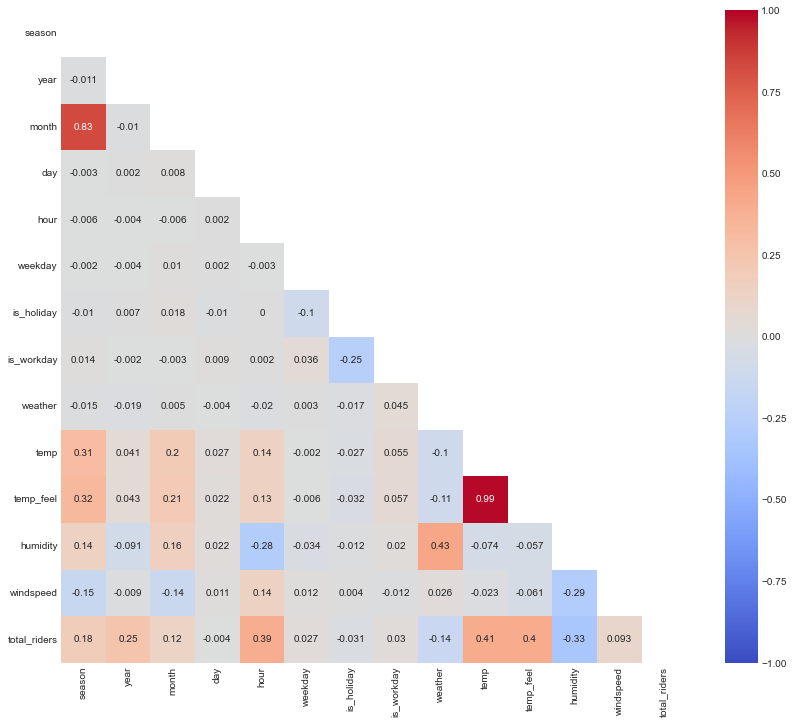

In [12]:
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlations, dtype=bool))
heatmap = sb.heatmap(correlations, annot=True, linewidths=0, vmin=-1, vmax=1, center=0, cmap="coolwarm", mask=mask)
fig = heatmap.get_figure();

 0.83  month + season 
 0.99  temp_feel + temp
 0.97  daytime_code + hour
-0.70  cold + temp
-0.73  cold + temp_feel
 0.54  hot + temp
 0.53  hot + temp_feel
 0.78  muggy + humidity
 0.69  total_riders + casual
 0.97  total_riders + registered

Drop hot, cold, muggy, daytime_code, season, temp, total_riders

<hr>

This is where the correlateds are dropped.

In [13]:
#hourly_two_riders = hourly_numeric.drop(columns=['hot', 'cold', 'muggy', 'daytime_code', 'season', 'temp', 'total_riders'])
hourly_total_riders = hourly_numeric.drop(columns=['season', 'temp'])

Text(0.5, 1.0, 'Registered and Casual riders')

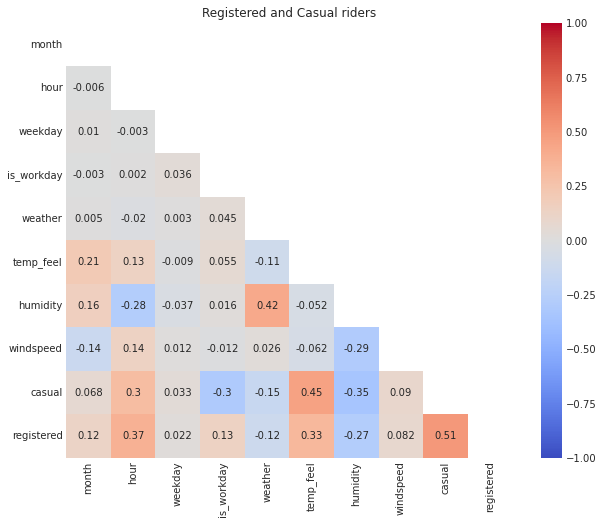

In [78]:
correlations = hourly_two_riders.corr(method='pearson', min_periods=1).round(3)

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlations, dtype=bool))
heatmap = sb.heatmap(correlations, annot=True, linewidths=0, vmin=-1, vmax=1, center=0, cmap="coolwarm", mask=mask)
fig = heatmap.get_figure();
plt.title('Registered and Casual riders')

Text(0.5, 1.0, 'Total riders only')

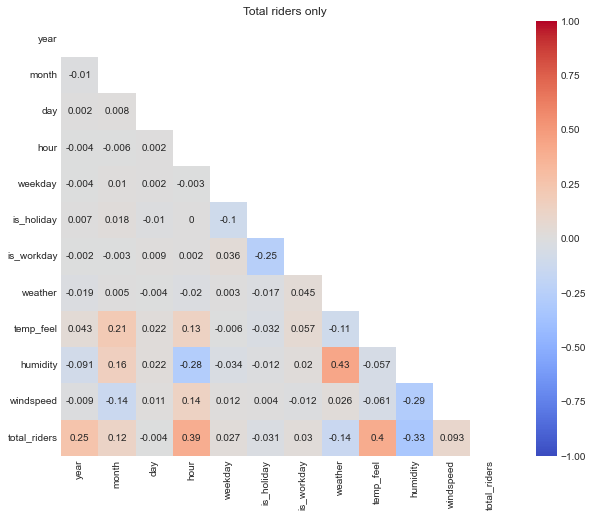

In [14]:
correlations = hourly_total_riders.corr(method='pearson', min_periods=1).round(3)

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlations, dtype=bool))
heatmap = sb.heatmap(correlations, annot=True, linewidths=0, vmin=-1, vmax=1, center=0, cmap="coolwarm", mask=mask)
fig = heatmap.get_figure();
plt.title('Total riders only')

In [15]:
correlations = hourly_total_riders.corr() # default is Pearson coefficient
#print(correlations)
correlations['temp_feel'].round(2)

year            0.04
month           0.21
day             0.02
hour            0.13
weekday        -0.01
is_holiday     -0.03
is_workday      0.06
weather        -0.11
temp_feel       1.00
humidity       -0.06
windspeed      -0.06
total_riders    0.40
Name: temp_feel, dtype: float64

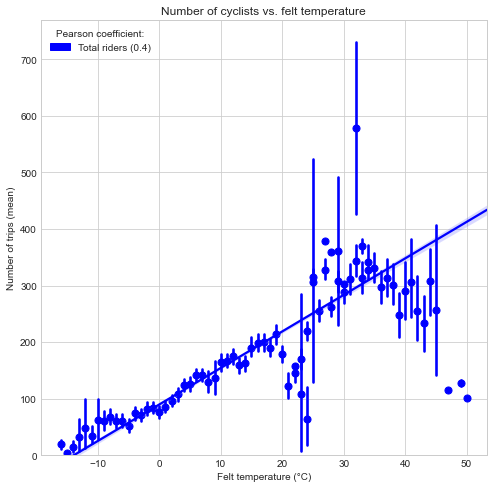

In [16]:
plt.figure(figsize=(8,8))#, dpi=128)
sb.set_style("whitegrid")
s1 = sb.regplot(x='temp_feel', y='total_riders', data=hourly_total_riders, ci=95, truncate=False, x_estimator=np.mean, color='blue')
#s2 = sb.regplot(x='temp_feel', y='casual', data=hourly_core, ci=95, truncate=False, x_estimator=np.mean, color='brown')
plt.ylim(0)
plt.title('Number of cyclists vs. felt temperature')
plt.ylabel('Number of trips (mean)')
plt.xlabel('Felt temperature (°C)')
top_bar = mpatches.Patch(color='blue', label='Total riders (0.4)')
plt.legend(title='Pearson coefficient:', handles=[top_bar], loc='upper left');

In [17]:
# To test if this correlation is statistically significant, we can calculate the p-value associated 
# with the Pearson correlation coefficient by using the Scipy pearsonr() function, which returns 
# the Pearson correlation coefficient along with the two-tailed p-value.
# Returns first the correlation coefficent and second the two-tailed p-value. 
# If p-value is less than 0.5, there is a statistically significant correlation between var1 and var2.

pearsonr(hourly_total_riders.temp_feel, hourly_total_riders.total_riders)

(0.40345124071728533, 0.0)

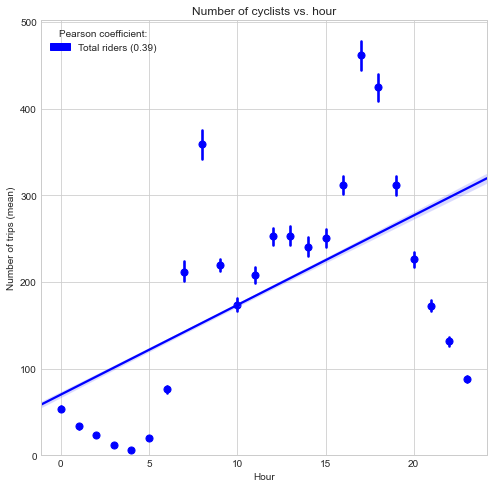

In [18]:
plt.figure(figsize=(8,8))#, dpi=128)
sb.set_style("whitegrid")
s1 = sb.regplot(x='hour', y='total_riders', data=hourly_total_riders, ci=95, truncate=False, x_estimator=np.mean, color='blue')
#s2 = sb.regplot(x='temp_feel', y='casual', data=hourly_core, ci=95, truncate=False, x_estimator=np.mean, color='brown')
plt.ylim(0)
plt.title('Number of cyclists vs. hour')
plt.ylabel('Number of trips (mean)')
plt.xlabel('Hour')
top_bar = mpatches.Patch(color='blue', label='Total riders (0.39)')
plt.legend(title='Pearson coefficient:', handles=[top_bar], loc='upper left');

In [19]:
# To test if this correlation is statistically significant, we can calculate the p-value associated 
# with the Pearson correlation coefficient by using the Scipy pearsonr() function, which returns 
# the Pearson correlation coefficient along with the two-tailed p-value.
# Returns first the correlation coefficent and second the two-tailed p-value. 
# If p-value is less than 0.5, there is a statistically significant correlation between var1 and var2.

pearsonr(hourly_total_riders.hour, hourly_total_riders.total_riders)

(0.39407149778294465, 0.0)

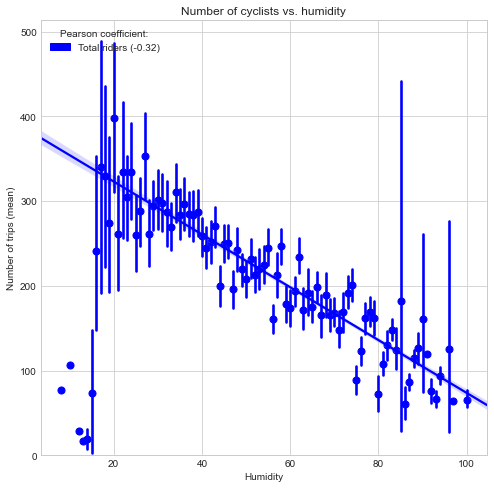

In [20]:
plt.figure(figsize=(8,8))#, dpi=128)
sb.set_style("whitegrid")
s1 = sb.regplot(x='humidity', y='total_riders', data=hourly_total_riders, ci=95, truncate=False, x_estimator=np.mean, color='blue')
#s2 = sb.regplot(x='temp_feel', y='casual', data=hourly_core, ci=95, truncate=False, x_estimator=np.mean, color='brown')
plt.ylim(0)
plt.title('Number of cyclists vs. humidity')
plt.ylabel('Number of trips (mean)')
plt.xlabel('Humidity')
top_bar = mpatches.Patch(color='blue', label='Total riders (-0.32)')
plt.legend(title='Pearson coefficient:', handles=[top_bar], loc='upper left');

In [21]:
# To test if this correlation is statistically significant, we can calculate the p-value associated 
# with the Pearson correlation coefficient by using the Scipy pearsonr() function, which returns 
# the Pearson correlation coefficient along with the two-tailed p-value.
# Returns first the correlation coefficent and second the two-tailed p-value. 
# If p-value is less than 0.5, there is a statistically significant correlation between var1 and var2.

pearsonr(hourly_total_riders.humidity, hourly_total_riders.total_riders)

(-0.33017926092289773, 0.0)

In [33]:
hourly_total_riders.head()

,year,month,day,hour,weekday,is_holiday,is_workday,weather,temp_feel,humidity,windspeed,total_riders
0,2011,1,1,0,6,0,0,1,3.0014,81.0,0.0,16
1,2011,1,1,1,6,0,0,1,1.9982,80.0,0.0,40
2,2011,1,1,2,6,0,0,1,1.9982,80.0,0.0,32
3,2011,1,1,3,6,0,0,1,3.0014,75.0,0.0,13
4,2011,1,1,4,6,0,0,1,3.0014,75.0,0.0,1


In [34]:
# Convert to 'category' data type

hourly_total_riders['weather']=hourly_total_riders['weather'].astype('category')
hourly_total_riders['month']=hourly_total_riders['month'].astype('category')
hourly_total_riders['weekday']=hourly_total_riders['weekday'].astype('category')
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

hourly_total_riders = pd.get_dummies(hourly_total_riders, drop_first=True)
hourly_total_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          17379 non-null  int64  
 1   day           17379 non-null  int64  
 2   hour          17379 non-null  int64  
 3   is_holiday    17379 non-null  int64  
 4   is_workday    17379 non-null  int64  
 5   temp_feel     17379 non-null  float64
 6   humidity      17379 non-null  float64
 7   windspeed     17379 non-null  float64
 8   total_riders  17379 non-null  int64  
 9   month_2       17379 non-null  uint8  
 10  month_3       17379 non-null  uint8  
 11  month_4       17379 non-null  uint8  
 12  month_5       17379 non-null  uint8  
 13  month_6       17379 non-null  uint8  
 14  month_7       17379 non-null  uint8  
 15  month_8       17379 non-null  uint8  
 16  month_9       17379 non-null  uint8  
 17  month_10      17379 non-null  uint8  
 18  month_11      17379 non-nu

In [35]:
hourly_total_riders = hourly_total_riders.set_index('date_time', inplace=False)
#hourly_two_riders = hourly_two_riders.set_index('date_time', inplace=False)

KeyError: "None of ['date_time'] are in the columns"

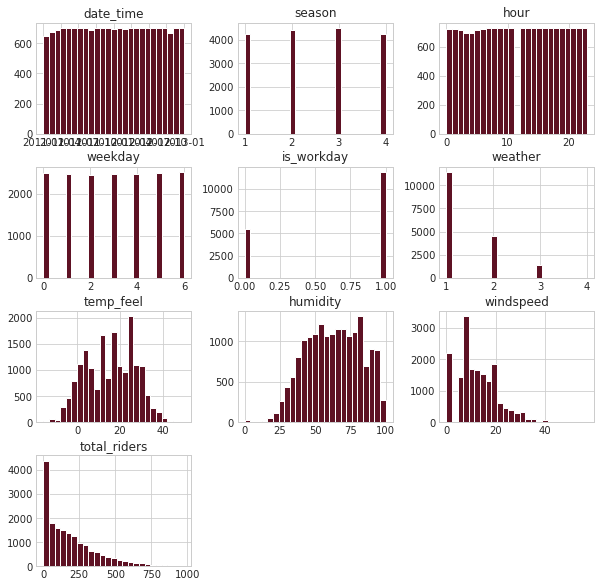

In [128]:
hourly_total_riders.hist(bins=25, figsize=(10,10), color='#5e1224');

In [122]:
# # Apply log transform to right-skewed values
# # fixes outliers

# def log_transform(col):
#     return np.log(col[0])

# hourly_total_riders['windspeed'] = hourly_total_riders[['windspeed']].apply(log_transform, axis=1)
# hourly_total_riders['total_riders'] = hourly_total_riders[['total_riders']].apply(log_transform, axis=1)

/tmp/ipykernel_5680/3561368323.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(col[0])


<hr>

Training sets

In [36]:
# train test split
test_size = 5214 # (approx 30% of the dataset)

df_train = hourly_total_riders[:-test_size]
df_test = hourly_total_riders[-test_size:]

y_train = df_train['total_riders']
X_train = df_train.drop(columns=['total_riders'])

y_test = df_test['total_riders']
X_test = df_test.drop(columns=['total_riders'])

<AxesSubplot:>

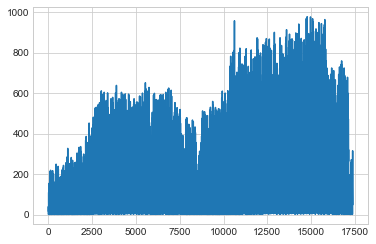

In [37]:
hourly_total_riders['total_riders'].plot()


In [38]:
# instantiate linear regression model
regr = LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [39]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 71.56117384  -0.09074341   6.17948659 -19.89119679   5.79171646
   6.01657911  -1.70095199   0.25464591  -7.11261882   9.03103962
  10.27945765  22.71097432 -16.90423569 -51.91582418 -26.69814654
  27.0719727   46.69399649  40.89556303  37.87970311  -5.02462017
  -5.18545073  -4.81695928  -2.61621659   3.54376645   8.35996834
   4.26497813 -23.5496458   40.75360698]
Mean squared error: 33583.65
Coefficient of determination: 0.31


In [40]:
y_pred = regr.predict(X_train)

print(r2_score(y_train, y_pred))

print(regr.score(X_test, y_test))


0.39679657413744485
0.30848776486552


In [41]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [42]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'

for name, model in models:

	kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison using cross validation results')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_ylabel('Weighted F1 Score')
ax.set_xticklabels(names)
plt.show()

c:\Users\oddbo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

model = DecisionTreeClassifier() ### Best Model

model.fit(X_train, y_train)
  
y_pred = model.predict(X_test)

#### Evaluation metrics ####

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
# disp.plot()
# plt.show()

# # Accuracy 
# print('Accuracy Score: ', accuracy_score(y_test,y_pred))

# # Balanced Accuracy
# print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))

# Classification Report 
print(classification_report(y_test, y_pred))

# Kappa score 
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen-Kappa score:", kappa)

              precision    recall  f1-score   support

           1       0.04      0.11      0.06         9
           2       0.10      0.22      0.13        18
           3       0.08      0.12      0.10        32
           4       0.03      0.05      0.04        38
           5       0.07      0.07      0.07        68
           6       0.12      0.19      0.15        59
           7       0.09      0.11      0.10        54
           8       0.14      0.13      0.14        61
           9       0.05      0.02      0.03        46
          10       0.04      0.04      0.04        53
          11       0.06      0.04      0.04        56
          12       0.06      0.08      0.07        39
          13       0.03      0.03      0.03        35
          14       0.10      0.07      0.08        28
          15       0.03      0.04      0.03        26
          16       0.03      0.03      0.03        29
          17       0.00      0.00      0.00        21
          18       0.17    

/home/jessica/anaconda3/envs/CABerlin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jessica/anaconda3/envs/CABerlin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jessica/anaconda3/envs/CABerlin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res